# 4. Discovering interpretable features

NMF = 'non-negative matrix factorization'

NMF is a dimension reduction technique

NMF models are interpretable, unlike PCA (and are easy to explain)

However, all sample features must be non-negative (>= 0), e.g. word frequences in each document, images encoded as arrays, audio spectrograms, purchase histories on e-commerce sites

NMF expresses documents as combinations of topics/themes, and expresses images as combinations of patterns

Must specify no. of components for NMF

(for documents) NMF components represent topics, NMF features combine topics into documents

(for images) NMF components are parts of images

NMF works with NumPy arrays and `csr_matrix`

e.g. word frequency array (rows: documents, columns: words - can measure presence of words in each document using tf-idf (tf: frequency of word in document, idf: reduces influence of frequent words))

Here, we will apply NMF to a tf-idf word-frequency array of Wikipedia articles (rows: article titles, columns: words)

In [1]:
from sklearn.decomposition import NMF
import pandas as pd
from scipy.sparse import csr_matrix

To preprocess `wikipedia-vectors.csv` into the format in which you used it in the exercises, you have to take its transpose:

```python
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)
```

The reason for taking this transpose is that without it, there would be 13,000 columns (corresponding to the 13,000 words in the file), which is a lot of columns for a CSV to have.

In [2]:
df = pd.read_csv('./datasets/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [3]:
articles

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

In [4]:
# Dimension of components = dimension of samples, entries non-negative
# NMF components are topics
model = NMF(n_components=6)
model.fit(articles)

NMF(n_components=6)

In [5]:
# NMF feature values are non-negative and can be used to reconstruct the samples
nmf_features = model.transform(articles)
nmf_features.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.44],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.56],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.4 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.38],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.48],
       [0.01, 0.01, 0.01, 0.03, 0.  , 0.33],
       [0.  , 0.  , 0.02, 0.  , 0.01, 0.36],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.49],
       [0.02, 0.01, 0.  , 0.02, 0.03, 0.48],
       [0.01, 0.03, 0.03, 0.07, 0.02, 0.34],
       [0.  , 0.  , 0.53, 0.  , 0.03, 0.  ],
       [0.  , 0.  , 0.35, 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.31, 0.06, 0.01, 0.02],
       [0.  , 0.01, 0.34, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.43, 0.  , 0.04, 0.  ],
       [0.  , 0.  , 0.48, 0.  , 0.  , 0.  ],
       [0.01, 0.02, 0.37, 0.03, 0.  , 0.01],
       [0.  , 0.  , 0.48, 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.55, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.46, 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.02, 0.51, 0.06, 0.01],
       [0.  , 0.  , 0.  , 0.51, 0.  , 0.  ],
       [0.

In [6]:
df = pd.DataFrame(nmf_features, index=titles)

In [7]:
df.loc['Anne Hathaway']

0    0.003815
1    0.000000
2    0.000000
3    0.571859
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64

In [8]:
df.loc['Denzel Washington']

0    0.000000
1    0.005575
2    0.000000
3    0.419558
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64

Here we see NMF feature 3 has by far the highest value (this means both articles are reconstructed using mainly the 3rd NMF component).

Components represent topics (e.g. acting).

NMF reconstructs samples from its components using the NMF feature values:

- Multiply components by feature values and add up
- Can be expressed as a product of matrices (matrix factorisation)

NMF components: $[[1, 0.5, 0], [0.2, 0.1, 2.1]]$

NMF feature values: $[2, 1]$

Reconstruction of original sample: $[2*1 + 1*0.2, 2*0.5 + 1*0.1, 2*0 + 1*2.1] = [2.2, 1.1, 2.1]$

When NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics.

In [9]:
words = pd.read_csv('./datasets/words.csv', index_col=0)

In [10]:
words

,0
1,aaron
2,abandon
3,abandoned
4,abandoning
5,abandonment
...,...
13121,zimbabwe
13122,zinc
13123,zone
13124,zones


In [11]:
components_df = pd.DataFrame(model.components_, columns=words)

In [12]:
components_df.shape

(6, 13125)

In [13]:
component = components_df.iloc[3, :]

In [14]:
component.nlargest()

(film,)       0.632113
(award,)      0.254837
(starred,)    0.246939
(role,)       0.212878
(actress,)    0.187655
Name: 3, dtype: float64

Here we see NMF feature 3 gives us the topics film, award, starred, role and actress, which align with what we found previously with Anne Hathaway and Denzel Washington (as they both had an NMF feature 3 value being very large).

Next, we will use NMF to decompose grayscale images into their commonly occurring patterns.

In [15]:
samples = pd.read_csv('./datasets/lcd-digits.csv', header=None).values

In [16]:
samples

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
from matplotlib import pyplot as plt

In [18]:
digit = samples[0, :]
digit

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

Here, each row is a single 13x8 image.

In [19]:
# Reshape digit to a 13x8 array
bitmap = digit.reshape(13, 8)
bitmap

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

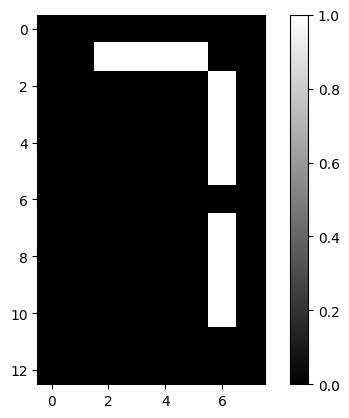

In [20]:
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

Next, we will see how NMF can learn parts of images.

In [21]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [22]:
model = NMF(n_components=7) # 7 is the no. of cells in an LED display

In [23]:
features = model.fit_transform(samples)

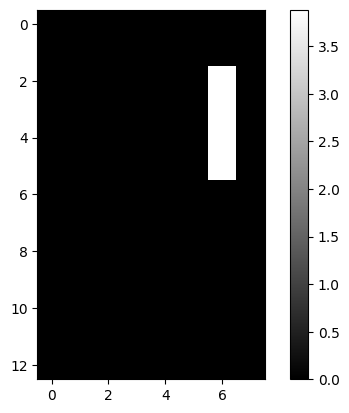

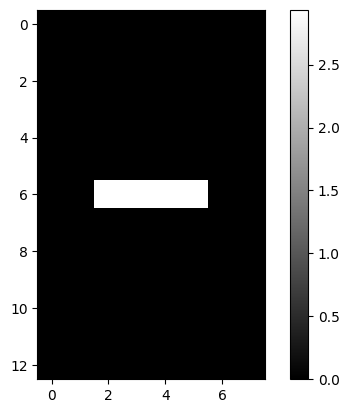

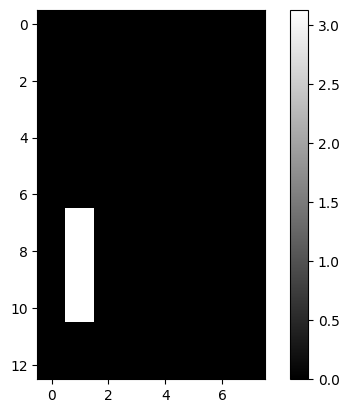

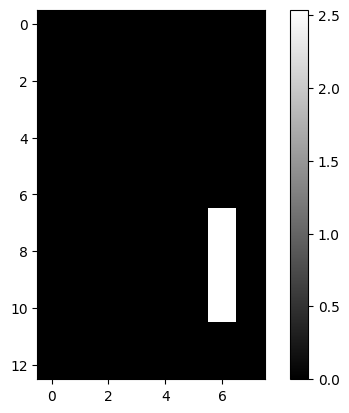

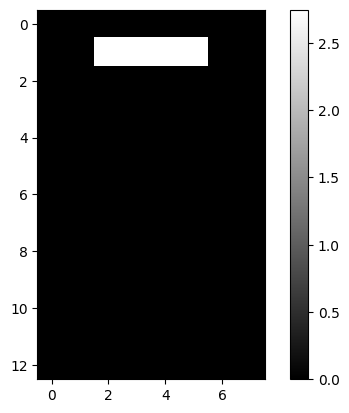

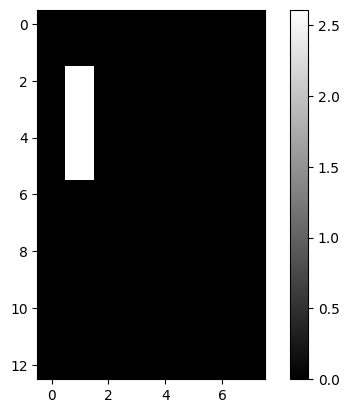

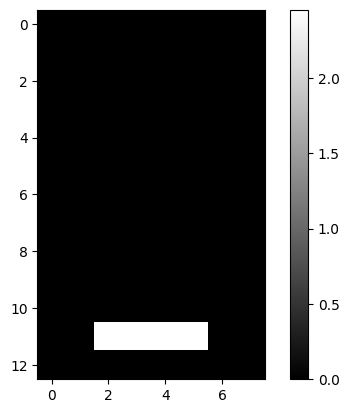

In [24]:
# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

In [25]:
digit_features = features[0, :]
digit_features

array([2.57347960e-01, 0.00000000e+00, 0.00000000e+00, 3.94333376e-01,
       3.64045642e-01, 0.00000000e+00, 3.51282114e-14])

Here we see NMF has expressed the digit as a sum of the components.

Unlike NMF, PCA doesn't learn the parts of things as its components do not correspond to topics (in the case of documents) or to parts of images. Hence the PCA components will not represent meaningful parts of images of LED digits.

## Recommender systems using NMF

We can use NMF features and the cosine similarity to find similar articles.

Similar articles should have similar topics.

Strategy:

- Apply NMF to the word-frequency array
- NMF feature values describe the topics (so similar documents have similar NMF feature values)

Fifferent versions of the same document have same topic proportions (but exact feature values may be different - e.g. because one version uses many meaningless words, alternate ways of saying the same thing in a strong or weak way).

But all versions lie on the same line through the origin.

Can use cosine similarity to compute angle between the lines (where higher values means more similar - max is 1 when angle is 0).

Firstly, we will find similar articles to Cristiano Ronaldo.

In [26]:
from sklearn.preprocessing import normalize

In [27]:
norm_features = normalize(nmf_features)

In [28]:
df = pd.DataFrame(norm_features, index=titles)

In [29]:
df.shape

(60, 6)

In [30]:
df.head(10)

,0,1,2,3,4,5
HTTP 404,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Alexa Internet,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Internet Explorer,0.009513,0.000000,0.000000,0.000000,0.000000,0.999955
HTTP cookie,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Google Search,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Tumblr,0.038116,0.040892,0.023033,0.099032,0.000000,0.993246
Hypertext Transfer Protocol,0.000000,0.000000,0.057426,0.000000,0.016801,0.998208
Social search,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Firefox,0.031738,0.029555,0.007799,0.049011,0.054406,0.996341
LinkedIn,0.031875,0.089990,0.088830,0.188219,0.056475,0.971792


In [31]:
# Select the row corresponding to 'Cristiano Ronaldo'
article = df.loc['Cristiano Ronaldo']

In [32]:
article

0    0.002507
1    0.999942
2    0.000859
3    0.010259
4    0.001949
5    0.000722
Name: Cristiano Ronaldo, dtype: float64

In [33]:
# Compute the dot product
# Cosine similarity: dot product, as NMF features are already normalized to have same magnitude
similarities = df.dot(article)

In [34]:
# Display those with the largest cosine similarity
similarities.nlargest()

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64

Here we see which articles are similar to Cristiano Ronaldo.

Secondly, we will use NMF to recommend popular music artists. Here, the rows correspond to artists, and the columns correspond to users. The entries give the no. of times each artist was listened to by each user.

In [35]:
artists = pd.read_csv('./datasets/artists.csv', index_col=0).values

In [36]:
artists

array([[  0,   0, 105, ...,   0,   0,   0],
       [128, 211,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,  55,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [37]:
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

In [38]:
# Scaling here transforms the data so all users have the same influence on the model
# regardless of how many different artists they've listened to
scaler = MaxAbsScaler()

In [39]:
nmf = NMF(n_components=20)

In [40]:
normalizer = Normalizer()

In [41]:
pipeline = make_pipeline(scaler, nmf, normalizer)

In [42]:
norm_features = pipeline.fit_transform(artists)

In [43]:
artist_names = pd.read_csv('./datasets/artist_names.csv', index_col=0).values.flatten()

In [44]:
artist_names

array(['Massive Attack', 'Sublime', 'Beastie Boys', 'Neil Young',
       'Dead Kennedys', 'Orbital', 'Miles Davis', 'Leonard Cohen',
       'Van Morrison', 'NOFX', 'Rancid', 'Lamb', 'Korn',
       'Dropkick Murphys', 'Bob Dylan', 'Eminem', 'Nirvana', 'Van Halen',
       'Damien Rice', 'Elvis Costello', 'Everclear', 'Jimi Hendrix',
       'PJ Harvey', 'Red Hot Chili Peppers', 'Ryan Adams', 'Soundgarden',
       'The White Stripes', 'Madonna', 'Eric Clapton', 'Bob Marley',
       'Dr. Dre', 'The Flaming Lips', 'Tom Waits', 'Moby', 'Cypress Hill',
       'Garbage', 'Fear Factory', '50 Cent', 'Ani DiFranco',
       'Matchbox Twenty', 'The Police', 'Eagles', 'Phish',
       'Stone Temple Pilots', 'Black Sabbath', 'Britney Spears',
       'Fatboy Slim', 'System of a Down', 'Simon & Garfunkel',
       'Snoop Dogg', 'Aimee Mann', 'Less Than Jake', 'Rammstein',
       'Reel Big Fish', 'The Prodigy', 'Pantera', 'Foo Fighters',
       'The Beatles', 'Incubus', 'Audioslave', 'Bright Eyes',
       

In [45]:
df = pd.DataFrame(norm_features, index=artist_names)

In [46]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Massive Attack,0.000000,0.000000,0.202269,0.000000,0.000000,0.000000,0.00000,0.891906,0.153679,0.009494,0.000000,0.297392,0.000000,0.058941,0.000000,0.000000,0.000000,0.000000,0.219013,0.000000
Sublime,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Beastie Boys,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Neil Young,0.316079,0.004547,0.000000,0.046774,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.944133,0.078188,0.000000,0.019649,0.000000
Dead Kennedys,0.000000,0.099613,0.000000,0.674636,0.000000,0.000000,0.00000,0.000000,0.114166,0.639970,0.318793,0.000000,0.000000,0.000000,0.000000,0.103530,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Franz Ferdinand,0.000000,0.000000,0.000000,0.000000,0.003607,0.000000,0.00000,0.000000,0.000000,0.000000,0.999969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006942,0.000000,0.000000
The Postal Service,0.000000,0.000000,0.000000,0.000000,0.007580,0.000000,0.00000,0.000000,0.999911,0.000000,0.000000,0.000000,0.000000,0.000000,0.002339,0.000000,0.000000,0.010685,0.000000,0.000000
The Dresden Dolls,0.000000,0.104391,0.169355,0.000000,0.000000,0.352282,0.00000,0.000000,0.096578,0.175999,0.218800,0.000000,0.315923,0.000000,0.000000,0.000000,0.316790,0.498322,0.545800,0.041902
The Killers,0.000000,0.000000,0.000000,0.000000,0.000000,0.002418,0.00000,0.000000,0.000000,0.000000,0.000000,0.002641,0.007292,0.004210,0.000000,0.000000,0.000000,0.999958,0.000000,0.000000


In [47]:
artist = df.loc['Bruce Springsteen']

In [48]:
# Compute cosine similarities
similarities = df.dot(artist)

In [49]:
# Display those with highest cosine similarity
similarities.nlargest()

Bruce Springsteen    1.000000
Leonard Cohen        0.964422
Neil Young           0.951538
The Beach Boys       0.858917
Van Morrison         0.841303
dtype: float64

Here, we can see the names of the artists most similar to Bruce Springsteen.